In [2]:
import py3Dmol
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

In [2]:
# Replace 'your_data_file.csv' with the path to your data file
data = pd.read_csv('../output_files/positions_data.txt', sep=' ', names=['particle', 'time', 'x', 'y'])
# Add a Z-coordinate
data['z'] = 0.0

data['time'] = (data['time']/70).astype(int)

In [3]:
# Pre-render frames for each time step
frames = {}
for time_step in data['time'].unique():
    frame_data = data[data['time'] == time_step]
    view = py3Dmol.view(width=800, height=400)
    for _, atom in frame_data.iterrows():
        view.addSphere({'center': {'x': atom['x'], 'y': atom['y'], 'z': atom['z']},
                        'radius': 1.0, 'color': 'blue'})
    view.zoomTo()
    frames[time_step] = view

# Function to display a frame for a given time step
def display_frame(time_step):
    return frames[time_step].show()

In [6]:
# Create a play widget
play = widgets.Play(
    value=0,
    min=data['time'].min(),
    max=data['time'].max(),
    step=1,
    interval=100,  # Change time in milliseconds
    description="Press play",
)

# Create a slider widget for time steps
time_slider = widgets.IntSlider(
    value=0,
    min=data['time'].min(),
    max=data['time'].max(),
    step=1,
    description='Time Step:',
)

# Link the play and slider widgets
widgets.jslink((play, 'value'), (time_slider, 'value'))

# Create a widget container
widget_container = widgets.HBox([play, time_slider])

# Update the visualization when the slider value changes
interactive_view = widgets.interactive_output(display_frame, {'time_step': time_slider})

# Display everything
display(widget_container, interactive_view)

Output()

In [3]:
data

,particle,time,x,y,z
0,0,0,14.2857,14.28570,0.0
1,1,0,28.5714,14.28570,0.0
2,2,0,42.8571,14.28570,0.0
3,3,0,57.1429,14.28570,0.0
4,4,0,71.4286,14.28570,0.0
...,...,...,...,...,...
8023,31,222,19.2803,73.25770,0.0
8024,32,222,42.9600,1.31923,0.0
8025,33,222,59.7848,1.02806,0.0
8026,34,222,77.9835,1.23034,0.0


# Energy

In [6]:
import matplotlib.pyplot as plt

In [3]:
energy_data = pd.read_csv('../output_files/energy_data.txt', sep=' ', names=['time', 'energy'])


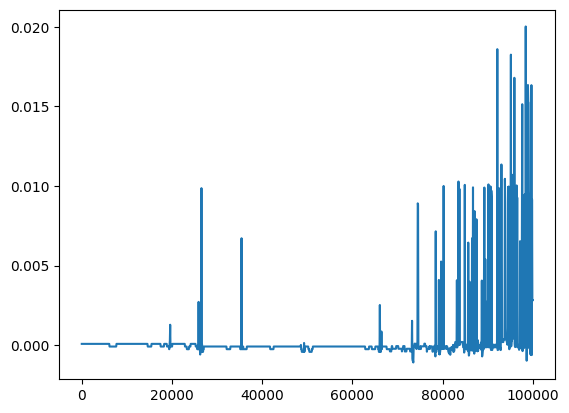

In [7]:
plt.plot(energy_data.time, energy_data.energy)